### Data Exploration 

#### Lets import the necessary libs and load the dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline

# import model and fit
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso, LassoCV,RidgeCV, ElasticNet
from sklearn.preprocessing import StandardScaler, MinMaxScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsRegressor

#### Reading Data

In [3]:
df = pd.read_csv("kc_house_data.csv")

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [6]:
df.shape

(21613, 21)

In [7]:
df_train,df_test=train_test_split(df, test_size=.2, random_state=10)

In [8]:
df_train.shape

(17290, 21)

In [9]:
df_test.shape

(4323, 21)

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17290 entries, 15949 to 17673
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             17290 non-null  int64  
 1   date           17290 non-null  object 
 2   price          17290 non-null  float64
 3   bedrooms       17290 non-null  int64  
 4   bathrooms      17290 non-null  float64
 5   sqft_living    17290 non-null  int64  
 6   sqft_lot       17290 non-null  int64  
 7   floors         17290 non-null  float64
 8   waterfront     17290 non-null  int64  
 9   view           17290 non-null  int64  
 10  condition      17290 non-null  int64  
 11  grade          17290 non-null  int64  
 12  sqft_above     17290 non-null  int64  
 13  sqft_basement  17290 non-null  int64  
 14  yr_built       17290 non-null  int64  
 15  yr_renovated   17290 non-null  int64  
 16  zipcode        17290 non-null  int64  
 17  lat            17290 non-null  float64
 18  lo

there is Object type in date should be Numeric! we will convert it later

In [11]:
df_train.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.729000e+04,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,4.586337e+09,5.402433e+05,3.372701,2.115862,2080.230943,1.496649e+04,1.491151,0.007634,0.235396,3.413245,7.664488,1786.008444,294.222499,1970.898207,85.990573,98077.765934,47.560626,-122.213218,1989.023250,12795.067206
std,2.874865e+09,3.632544e+05,0.935922,0.771611,915.601503,3.954196e+04,0.538696,0.087044,0.767490,0.653362,1.173943,825.928205,443.879716,29.362130,405.259081,53.437100,0.138192,0.140959,689.034165,27379.350862
min,1.000102e+06,7.500000e+04,0.000000,0.000000,370.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,620.000000,651.000000
25%,2.124049e+09,3.200000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471925,-122.327000,1490.000000,5100.000000
50%,3.905040e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572800,-122.229000,1840.000000,7620.000000
75%,7.308600e+09,6.469500e+05,4.000000,2.500000,2550.000000,1.072300e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2200.000000,570.000000,1996.000000,0.000000,98117.000000,47.678400,-122.124000,2360.000000,10125.000000
max,9.900000e+09,6.885000e+06,33.000000,8.000000,13540.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Data Preprocessing

#### show the correlations between features and target

In [12]:
correlation_matrix = df_train.corr()
correlation_matrix["price"]

id              -0.013927
price            1.000000
bedrooms         0.302944
bathrooms        0.523657
sqft_living      0.699111
sqft_lot         0.091601
floors           0.252762
waterfront       0.257969
view             0.395379
condition        0.035486
grade            0.675100
sqft_above       0.605499
sqft_basement    0.315418
yr_built         0.060613
yr_renovated     0.115392
zipcode         -0.057404
lat              0.309859
long             0.022572
sqft_living15    0.596289
sqft_lot15       0.082624
Name: price, dtype: float64

#### Check if there is any duplicated

In [13]:
df_train.duplicated().sum()

0

#### Check if there is any missing values

In [14]:
df_train.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

so, there is no null values

#### rename the columns to be more readable 

In [15]:
df_train.rename(columns={'view':'view_property','yr_built':'year_built','yr_renovated':'year_renovated','grade':'design_of_build', }, inplace=True)
df_train

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view_property,...,design_of_build,sqft_above,sqft_basement,year_built,year_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15949,3223049073,20150413T000000,235000.0,2,1.00,930,10505,1.0,0,0,...,6,930,0,1930,0,98148,47.4337,-122.329,1520,8881
16409,7231600098,20141014T000000,225000.0,2,1.00,700,6000,1.0,0,0,...,6,700,0,1943,0,98055,47.4671,-122.212,1320,6000
14668,6003500995,20140617T000000,729000.0,3,1.00,1580,3840,2.0,0,0,...,8,1580,0,1908,0,98102,47.6192,-122.319,1680,2624
6877,9406520290,20141229T000000,305000.0,3,2.25,1646,12414,2.0,0,0,...,7,1646,0,1996,0,98038,47.3630,-122.035,1654,8734
20213,9358001403,20140903T000000,380000.0,3,3.25,1450,1468,2.0,0,0,...,8,1100,350,2009,0,98126,47.5664,-122.370,1450,1478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9372,6386700110,20140805T000000,245000.0,3,2.00,1850,8208,1.0,0,0,...,7,1180,670,1970,0,98023,47.3109,-122.362,1790,8174
7291,4058200630,20141002T000000,353000.0,3,1.75,2190,7021,1.0,0,2,...,7,1390,800,1953,0,98178,47.5033,-122.232,2180,7155
17728,2207100165,20150430T000000,475000.0,4,1.50,1580,10260,1.0,0,0,...,7,1030,550,1955,0,98007,47.5984,-122.147,1520,7000
7293,4178500440,20150128T000000,279900.0,3,2.00,1410,6600,1.0,0,0,...,7,1410,0,1990,0,98042,47.3596,-122.089,1750,7150


In [16]:
# Change date to datetime format

clean_date = df_train.date.apply(lambda x: x.split('T')[0])
clean_date

15949    20150413
16409    20141014
14668    20140617
6877     20141229
20213    20140903
           ...   
9372     20140805
7291     20141002
17728    20150430
7293     20150128
17673    20141121
Name: date, Length: 17290, dtype: object

In [17]:
df_train['date'] = clean_date
df_train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view_property,...,design_of_build,sqft_above,sqft_basement,year_built,year_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15949,3223049073,20150413,235000.0,2,1.00,930,10505,1.0,0,0,...,6,930,0,1930,0,98148,47.4337,-122.329,1520,8881
16409,7231600098,20141014,225000.0,2,1.00,700,6000,1.0,0,0,...,6,700,0,1943,0,98055,47.4671,-122.212,1320,6000
14668,6003500995,20140617,729000.0,3,1.00,1580,3840,2.0,0,0,...,8,1580,0,1908,0,98102,47.6192,-122.319,1680,2624
6877,9406520290,20141229,305000.0,3,2.25,1646,12414,2.0,0,0,...,7,1646,0,1996,0,98038,47.3630,-122.035,1654,8734
20213,9358001403,20140903,380000.0,3,3.25,1450,1468,2.0,0,0,...,8,1100,350,2009,0,98126,47.5664,-122.370,1450,1478


In [18]:
df_train['date'] = pd.to_datetime(df_train['date'], format ='%Y/%m/%d')

df_train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view_property,...,design_of_build,sqft_above,sqft_basement,year_built,year_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15949,3223049073,2015-04-13,235000.0,2,1.00,930,10505,1.0,0,0,...,6,930,0,1930,0,98148,47.4337,-122.329,1520,8881
16409,7231600098,2014-10-14,225000.0,2,1.00,700,6000,1.0,0,0,...,6,700,0,1943,0,98055,47.4671,-122.212,1320,6000
14668,6003500995,2014-06-17,729000.0,3,1.00,1580,3840,2.0,0,0,...,8,1580,0,1908,0,98102,47.6192,-122.319,1680,2624
6877,9406520290,2014-12-29,305000.0,3,2.25,1646,12414,2.0,0,0,...,7,1646,0,1996,0,98038,47.3630,-122.035,1654,8734
20213,9358001403,2014-09-03,380000.0,3,3.25,1450,1468,2.0,0,0,...,8,1100,350,2009,0,98126,47.5664,-122.370,1450,1478


#### Price column - convert to integers

Prices should be integers, not floats. Pennies are irreleveant when dealing with high prices.

In [19]:
df_train.price = df_train.price.astype(np.int64)

In [20]:
# Confirm price column was converted to type int

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17290 entries, 15949 to 17673
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               17290 non-null  int64         
 1   date             17290 non-null  datetime64[ns]
 2   price            17290 non-null  int64         
 3   bedrooms         17290 non-null  int64         
 4   bathrooms        17290 non-null  float64       
 5   sqft_living      17290 non-null  int64         
 6   sqft_lot         17290 non-null  int64         
 7   floors           17290 non-null  float64       
 8   waterfront       17290 non-null  int64         
 9   view_property    17290 non-null  int64         
 10  condition        17290 non-null  int64         
 11  design_of_build  17290 non-null  int64         
 12  sqft_above       17290 non-null  int64         
 13  sqft_basement    17290 non-null  int64         
 14  year_built       17290 non-null  i

#### Check for outliers

In [21]:
df_train.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view_property', 'condition',
       'design_of_build', 'sqft_above', 'sqft_basement', 'year_built',
       'year_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [22]:
cols_to_plot = df_train[['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view_property', 'condition', 'design_of_build',
       'sqft_above', 'sqft_basement', 'year_built', 'year_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]

Graph for Price: Total = 3494


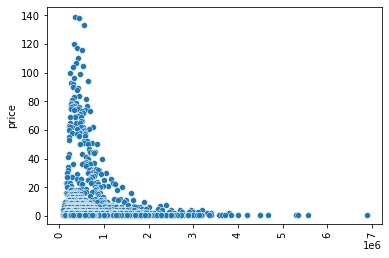

Graph for Bedrooms: Total = 13


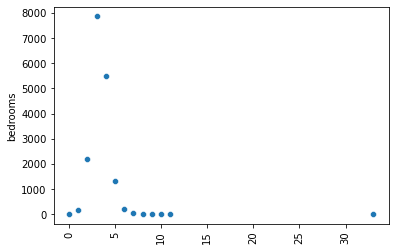

Graph for Bathrooms: Total = 30


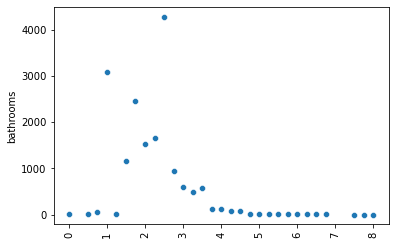

Graph for Sqft_living: Total = 925


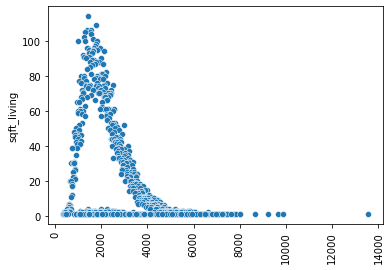

Graph for Sqft_lot: Total = 8459


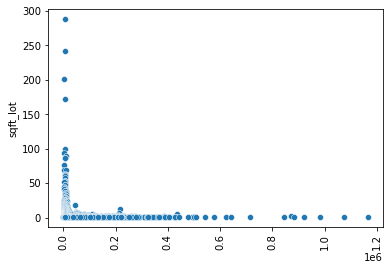

Graph for Floors: Total = 6


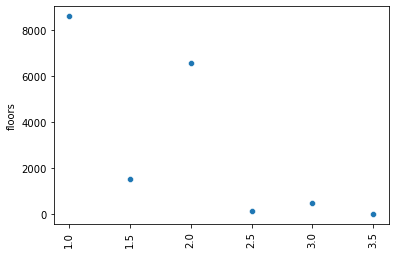

Graph for Waterfront: Total = 2


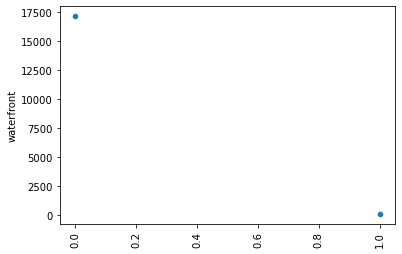

Graph for View_property: Total = 5


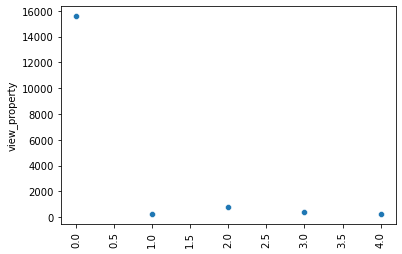

Graph for Condition: Total = 5


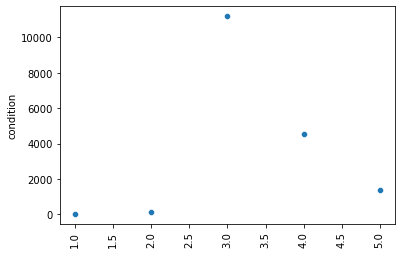

Graph for Design_of_build: Total = 11


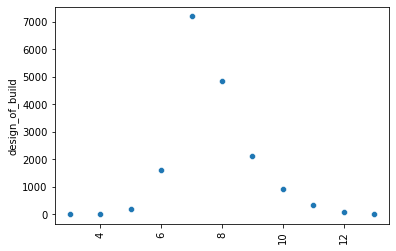

Graph for Sqft_above: Total = 849


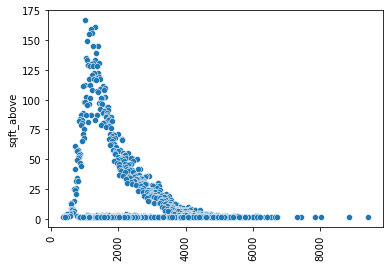

Graph for Sqft_basement: Total = 286


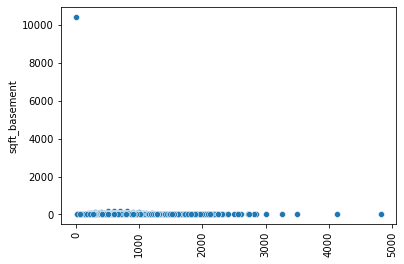

Graph for Year_built: Total = 116


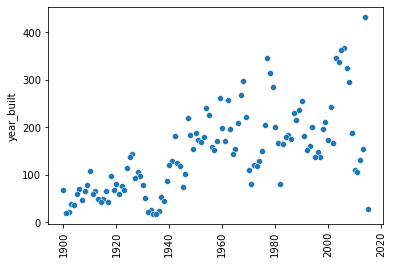

Graph for Year_renovated: Total = 70


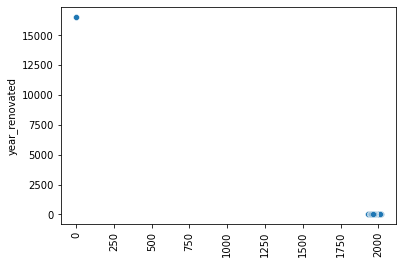

Graph for Zipcode: Total = 70


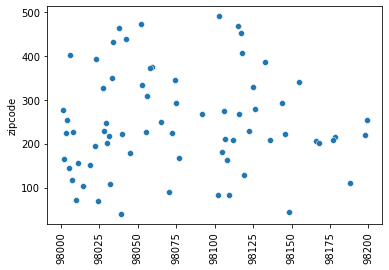

Graph for Lat: Total = 4840


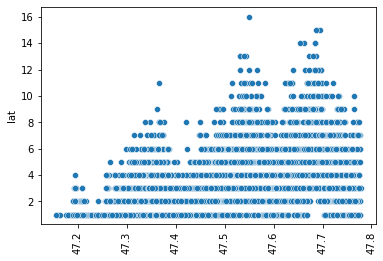

Graph for Long: Total = 735


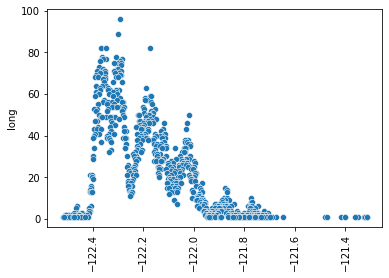

Graph for Sqft_living15: Total = 721


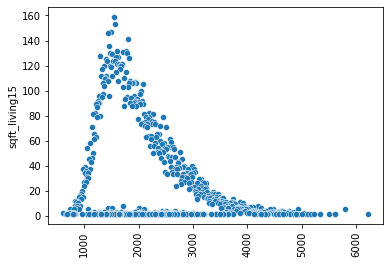

Graph for Sqft_lot15: Total = 7566


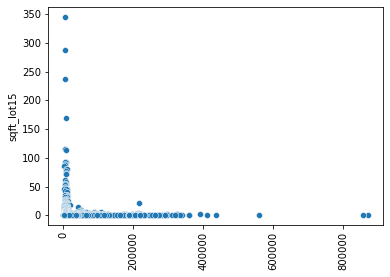

In [23]:
# Function to plot scatterplots

def plot_scatterplots():
    for i in cols_to_plot.columns:
        cat_num = cols_to_plot[i].value_counts()
        print('Graph for {}: Total = {}'.format(i.capitalize(), len(cat_num)))
        sns.scatterplot(x=cat_num.index, y=cat_num)
        plt.xticks(rotation=90)
        plt.show()
        
plot_scatterplots();

#### Price - Outliers

In [24]:
# Over 6mil - Only 3 listings, let's see how many houses cost more than 4mil.

df_train.loc[df_train.price > 6000000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view_property,...,design_of_build,sqft_above,sqft_basement,year_built,year_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9254,9208900037,2014-09-19,6885000,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.24,4540,42730


In [25]:
# Only 11 homes over $4mil.
# I think we can safely drop these. 

print(len(df_train.loc[df_train.price > 4000000]))
df_train.loc[df_train.price > 4000000]

8


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view_property,...,design_of_build,sqft_above,sqft_basement,year_built,year_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1315,7558700030,2015-04-13,5300000,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1448,8907500070,2015-04-13,5350000,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
2626,7738500731,2014-08-15,4500000,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8092,1924059029,2014-06-17,4668000,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
8638,3835500195,2014-06-18,4489000,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592
12370,6065300370,2015-05-06,4208000,5,6.00,7440,21540,2.0,0,0,...,12,5550,1890,2003,0,98006,47.5692,-122.189,4740,19329
9254,9208900037,2014-09-19,6885000,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4411,2470100110,2014-08-04,5570000,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345


In [26]:
# Drop homes over $4mil

df_train = df_train[df_train.price < 4000000]
df_train

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view_property,...,design_of_build,sqft_above,sqft_basement,year_built,year_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15949,3223049073,2015-04-13,235000,2,1.00,930,10505,1.0,0,0,...,6,930,0,1930,0,98148,47.4337,-122.329,1520,8881
16409,7231600098,2014-10-14,225000,2,1.00,700,6000,1.0,0,0,...,6,700,0,1943,0,98055,47.4671,-122.212,1320,6000
14668,6003500995,2014-06-17,729000,3,1.00,1580,3840,2.0,0,0,...,8,1580,0,1908,0,98102,47.6192,-122.319,1680,2624
6877,9406520290,2014-12-29,305000,3,2.25,1646,12414,2.0,0,0,...,7,1646,0,1996,0,98038,47.3630,-122.035,1654,8734
20213,9358001403,2014-09-03,380000,3,3.25,1450,1468,2.0,0,0,...,8,1100,350,2009,0,98126,47.5664,-122.370,1450,1478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9372,6386700110,2014-08-05,245000,3,2.00,1850,8208,1.0,0,0,...,7,1180,670,1970,0,98023,47.3109,-122.362,1790,8174
7291,4058200630,2014-10-02,353000,3,1.75,2190,7021,1.0,0,2,...,7,1390,800,1953,0,98178,47.5033,-122.232,2180,7155
17728,2207100165,2015-04-30,475000,4,1.50,1580,10260,1.0,0,0,...,7,1030,550,1955,0,98007,47.5984,-122.147,1520,7000
7293,4178500440,2015-01-28,279900,3,2.00,1410,6600,1.0,0,0,...,7,1410,0,1990,0,98042,47.3596,-122.089,1750,7150


#### Bedrooms - outliers

In [27]:
df_train.bedrooms.value_counts()

3     7857
4     5480
2     2197
5     1326
6      201
1      161
7       28
0       12
8        9
9        5
10       3
33       1
11       1
Name: bedrooms, dtype: int64

 remove all homes with 10, 11, and 33 bedrooms.

In [28]:
# Drop 10, 11, and 33 bedroom homes

df_train = df_train[df_train.bedrooms < 10]

In [29]:
df_train[df_train.bedrooms == 0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view_property,...,design_of_build,sqft_above,sqft_basement,year_built,year_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8477,2569500210,2014-11-17,339950,0,2.50,2290,8319,2.0,0,0,...,8,2290,0,1985,0,98042,47.3473,-122.151,2500,8751
3119,3918400017,2015-02-05,380000,0,0.00,1470,979,3.0,0,2,...,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
14423,9543000205,2015-04-13,139950,0,0.00,844,4269,1.0,0,0,...,7,844,0,1913,0,98001,47.2781,-122.250,1380,9600
6994,2954400190,2014-06-24,1295650,0,0.00,4810,28008,2.0,0,0,...,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
8484,2310060040,2014-09-25,240000,0,2.50,1810,5669,2.0,0,0,...,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685
12653,7849202299,2015-02-18,320000,0,2.50,1490,7111,2.0,0,0,...,7,1490,0,1999,0,98065,47.5261,-121.826,1500,4675
3467,1453602309,2014-08-05,288000,0,1.50,1430,1650,3.0,0,0,...,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650
4868,6896300380,2014-10-02,228000,0,1.00,390,5900,1.0,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000
9773,3374500520,2015-04-29,355000,0,0.00,2460,8049,2.0,0,0,...,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
9854,7849202190,2014-12-23,235000,0,0.00,1470,4800,2.0,0,0,...,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200


#### Bathrooms - outliers

In [30]:
df_train[df_train.bathrooms == 0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view_property,...,design_of_build,sqft_above,sqft_basement,year_built,year_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3119,3918400017,2015-02-05,380000,0,0.0,1470,979,3.0,0,2,...,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
1149,3421079032,2015-02-17,75000,1,0.0,670,43377,1.0,0,0,...,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
14423,9543000205,2015-04-13,139950,0,0.0,844,4269,1.0,0,0,...,7,844,0,1913,0,98001,47.2781,-122.250,1380,9600
6994,2954400190,2014-06-24,1295650,0,0.0,4810,28008,2.0,0,0,...,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
9773,3374500520,2015-04-29,355000,0,0.0,2460,8049,2.0,0,0,...,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
10481,203100435,2014-09-18,484000,1,0.0,690,23244,1.0,0,0,...,7,690,0,1948,0,98053,47.6429,-121.955,1690,19290
5832,5702500050,2014-11-04,280000,1,0.0,600,24501,1.0,0,0,...,3,600,0,1950,0,98045,47.5316,-121.749,990,22549
9854,7849202190,2014-12-23,235000,0,0.0,1470,4800,2.0,0,0,...,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
875,6306400140,2014-06-12,1095000,0,0.0,3064,4764,3.5,0,2,...,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000


In [31]:
df_train = df_train[df_train.bathrooms > 0]

In [32]:
df_train.bathrooms.value_counts()

2.50    4275
1.00    3082
1.75    2453
2.25    1661
2.00    1531
1.50    1153
2.75     941
3.00     593
3.50     581
3.25     489
3.75     121
4.00     116
4.50      80
4.25      71
0.75      53
4.75      16
5.00      15
5.25       9
1.25       6
5.50       6
5.75       3
0.50       3
6.25       2
6.50       2
6.00       2
7.50       1
8.00       1
6.75       1
Name: bathrooms, dtype: int64

drop houses that have between 1-3 value counts number of bathrooms from above

In [33]:
df_train = df_train[df_train.bathrooms != 6.75]
df_train = df_train[df_train.bathrooms != 7.50]
df_train = df_train[df_train.bathrooms != 8.00]
df_train = df_train[df_train.bathrooms != 6.50]
df_train = df_train[df_train.bathrooms != 6.25]

In [34]:
df_train.bathrooms.value_counts()

2.50    4275
1.00    3082
1.75    2453
2.25    1661
2.00    1531
1.50    1153
2.75     941
3.00     593
3.50     581
3.25     489
3.75     121
4.00     116
4.50      80
4.25      71
0.75      53
4.75      16
5.00      15
5.25       9
5.50       6
1.25       6
5.75       3
0.50       3
6.00       2
Name: bathrooms, dtype: int64

#### Sqft_living - outliers

In [35]:
# These rows were dropped in one of the previous steps while removing outliers. 
df_train[df_train.sqft_living > 12000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view_property,...,design_of_build,sqft_above,sqft_basement,year_built,year_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


#### Sqft lot - outliers

In [36]:
df_train.sqft_lot.value_counts()

5000      288
6000      241
4000      201
7200      172
7500       99
         ... 
17882       1
3190        1
175421      1
9532        1
36862       1
Name: sqft_lot, Length: 8441, dtype: int64

In [37]:
print(len(df_train[df_train.sqft_lot > 750000]))
df_train[df_train.sqft_lot > 750000]

8


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view_property,...,design_of_build,sqft_above,sqft_basement,year_built,year_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7077,2724079090,2015-01-05,1650000,4,3.25,3920,881654,3.0,0,3,...,11,3920,0,2002,0,98024,47.5385,-121.896,2970,112384
20452,1125079111,2015-04-15,1600000,4,5.50,6530,871200,2.0,0,2,...,11,6530,0,2008,0,98014,47.6640,-121.878,1280,858132
6691,2624089007,2015-03-20,1998000,2,2.50,3900,920423,2.0,0,0,...,12,3900,0,2009,0,98065,47.5371,-121.756,2720,411962
3949,722069232,2014-09-05,998000,4,3.25,3770,982998,2.0,0,0,...,10,3770,0,1992,0,98058,47.4140,-122.087,2290,37141
9714,225079036,2015-01-07,937500,4,4.00,5545,871200,2.0,0,0,...,11,3605,1940,2003,0,98014,47.6760,-121.882,3420,871200
17319,3326079016,2015-05-04,190000,2,1.00,710,1164794,1.0,0,0,...,5,710,0,1915,0,98014,47.6888,-121.909,1680,16730
7647,2623069031,2014-05-21,542500,5,3.25,3010,1074218,1.5,0,0,...,8,2010,1000,1931,0,98027,47.4564,-122.004,2450,68825
4540,2522029039,2014-09-29,550000,3,2.00,3650,843309,2.0,0,0,...,7,3650,0,1991,0,98070,47.3627,-122.496,1870,273992


In [38]:
# Let's drop the rows of homes that have a lot of over 7500000 as they seem like outliers.

df_train = df_train[df_train.sqft_lot < 750000]

#### Sqft above - outliers

Maybe remove listings that are over 8000sqft? Possibly even over 6500 - depending on the number of listings.

In [39]:
df_train[df_train['sqft_above'] > 8000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view_property,...,design_of_build,sqft_above,sqft_basement,year_built,year_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [40]:
df_train[df_train.sqft_above > 6500]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view_property,...,design_of_build,sqft_above,sqft_basement,year_built,year_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16773,1630700380,2015-01-30,1920000,5,5.75,7730,230868,2.0,0,0,...,12,6660,1070,2004,0,98077,47.7615,-122.084,2660,39292
11105,4054530260,2014-06-27,1820000,4,4.50,6640,53330,2.0,0,0,...,12,6640,0,1993,0,98077,47.7283,-122.046,4620,68625
18594,3023069166,2014-07-08,1135250,5,4.00,7320,217800,2.0,0,0,...,11,7320,0,1992,0,98058,47.4473,-122.086,3270,34500
19858,2524069078,2015-01-22,2700000,4,4.00,7850,89651,2.0,0,0,...,12,7850,0,2006,0,98027,47.5406,-121.982,6210,95832
11871,8835800350,2015-01-12,1950000,4,3.25,7420,167869,2.0,0,3,...,12,7420,0,2002,0,98045,47.4548,-121.764,5610,169549


In [41]:
df_train= df_train[df_train.sqft_above < 6500]

#### sqft_basement - outliers

In [42]:
df_train[df_train.sqft_basement > 3000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view_property,...,design_of_build,sqft_above,sqft_basement,year_built,year_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
10085,7767000060,2014-09-12,1900000,5,4.25,6510,16471,2.0,0,3,...,11,3250,3260,1980,0,98040,47.5758,-122.242,4480,16471
15482,624069108,2014-08-12,3200000,4,3.25,7000,28206,1.0,1,4,...,12,3500,3500,1991,0,98075,47.5928,-122.086,4913,14663


In [43]:
# Let's drop the 2 outliers

df_train= df_train[df_train.sqft_basement < 3000]

#### sqft_lot15 - outliers

In [44]:
df_train[df_train.sqft_lot15 > 500000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view_property,...,design_of_build,sqft_above,sqft_basement,year_built,year_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
13464,3420069060,2014-11-07,790000,3,2.5,2640,432036,1.5,0,3,...,10,2640,0,1996,0,98022,47.1795,-122.036,1500,560617


In [45]:
# Drop the 1 row

df_train = df_train[df_train.sqft_lot15 < 500000]

Ensure all outliers have been dropped

Graph for Price: Total = 3474


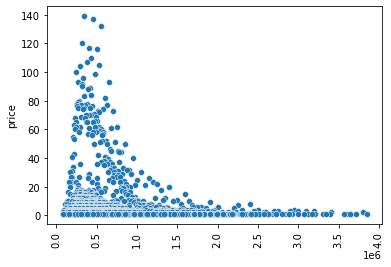

Graph for Bedrooms: Total = 10


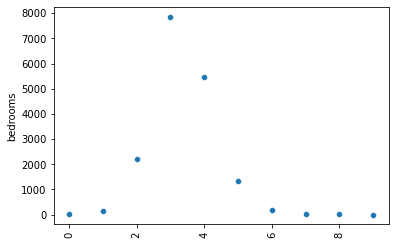

Graph for Bathrooms: Total = 23


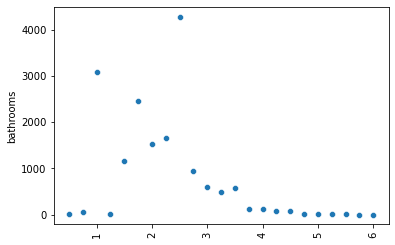

Graph for Sqft_living: Total = 900


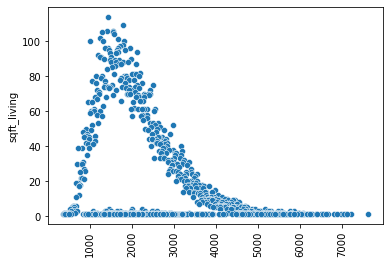

Graph for Sqft_lot: Total = 8428


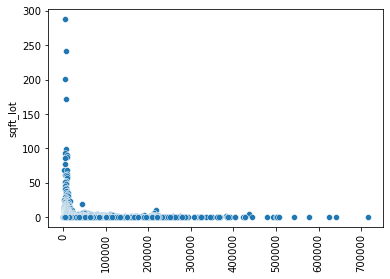

Graph for Floors: Total = 6


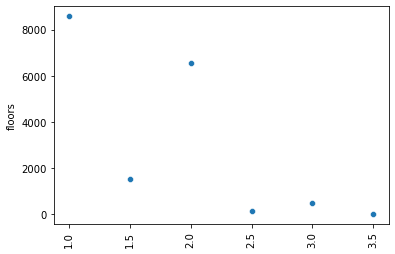

Graph for Waterfront: Total = 2


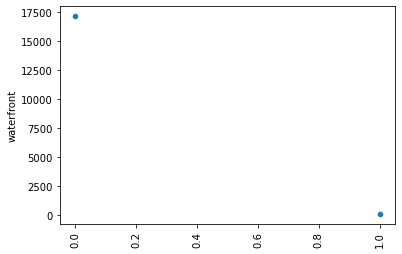

Graph for View_property: Total = 5


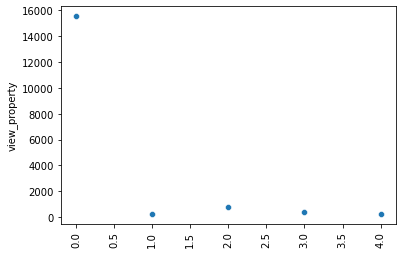

Graph for Condition: Total = 5


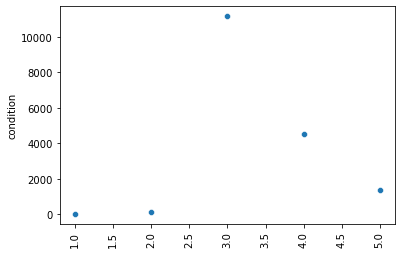

Graph for Design_of_build: Total = 11


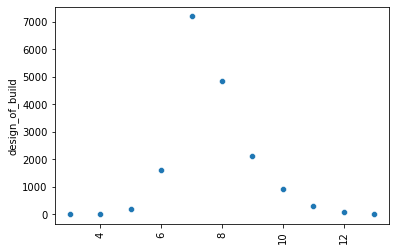

Graph for Sqft_above: Total = 828


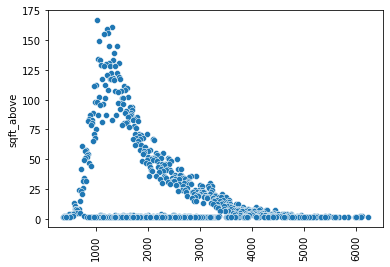

Graph for Sqft_basement: Total = 278


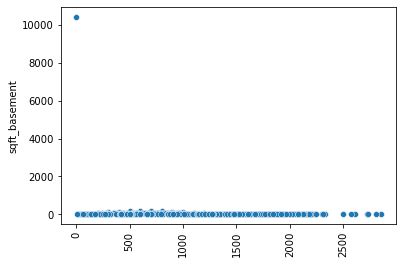

Graph for Year_built: Total = 116


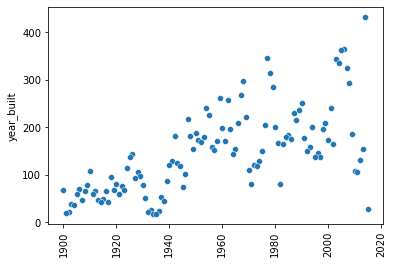

Graph for Year_renovated: Total = 70


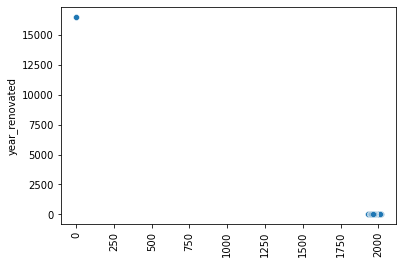

Graph for Zipcode: Total = 70


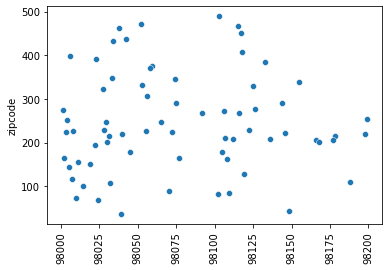

Graph for Lat: Total = 4837


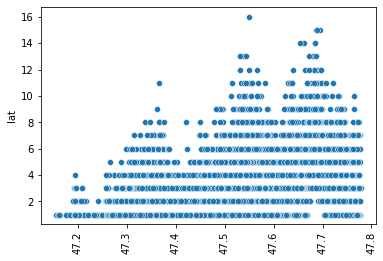

Graph for Long: Total = 733


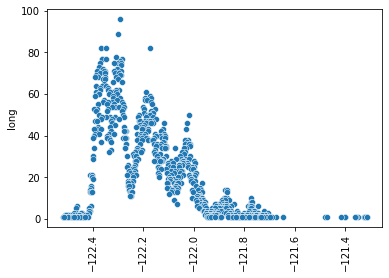

Graph for Sqft_living15: Total = 715


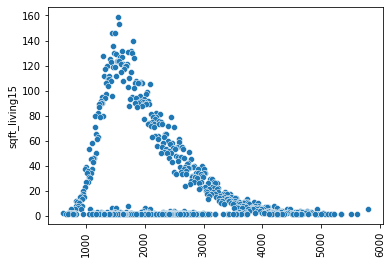

Graph for Sqft_lot15: Total = 7539


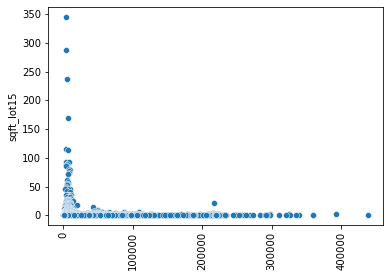

In [46]:
cols_to_plot = df_train[['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view_property', 'condition', 'design_of_build',
       'sqft_above', 'sqft_basement', 'year_built', 'year_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]
plot_scatterplots()

Looks better now with the clearest outliers removed.
I believe that more outliers exist within the dataset, however removing too many rows could lead to having a model that overfits the data.
Move on to Visualization

### Visualization


House Price Distribution

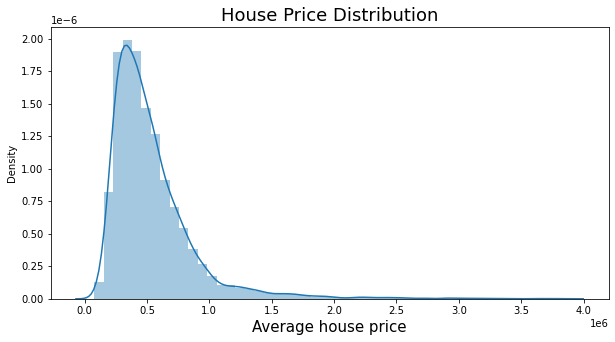

In [47]:
plt.figure(figsize=(10,5))
plt.title("House Price Distribution", size=18)
sns.distplot(df_train["price"])

plt.xlabel('Average house price', size=15)
plt.show()

The prices are slightly skewed to the right. May need to normalize the data.

#### Price vs SqftLot

Square footage of the land space

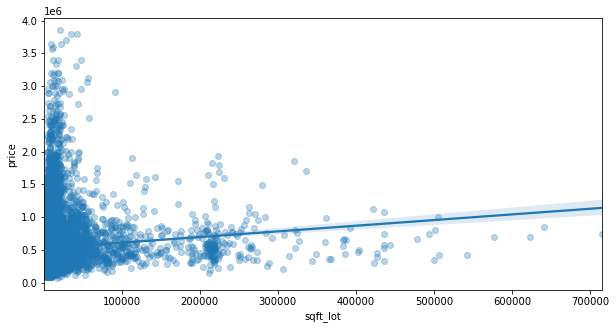

In [48]:
sqft_srs =df_train[['sqft_lot','price']].sort_values(by='sqft_lot')
sqft_df = sqft_srs.reset_index().drop('index',axis=1)
plt.figure(figsize=(10,5))
sns.regplot(x="sqft_lot", y="price", data=sqft_df, scatter_kws={'alpha':0.3});

In [49]:
sqft_df.corr()

,sqft_lot,price
sqft_lot,1.000000,0.084186
price,0.084186,1.000000


Its having lower corelation.

#### Bedrooms Vs Price

In [50]:
# Range of Bedrooms values
df_train.bedrooms.unique()        

array([2, 3, 4, 5, 6, 7, 1, 0, 8, 9])

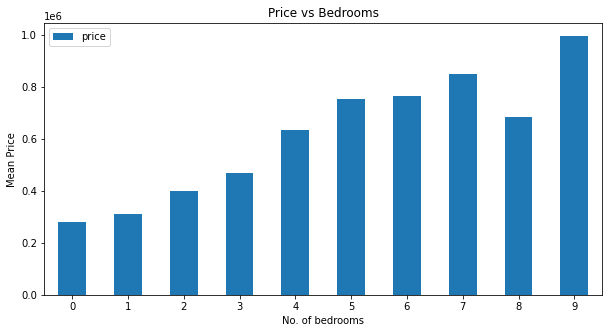

In [51]:
plt.figure(figsize=(10,5))
df_train.groupby('bedrooms').price.mean().plot(kind='bar',rot=0)
plt.xlabel("No. of bedrooms")
plt.ylabel("Mean Price")
plt.title("Price vs Bedrooms")
plt.legend();

In [52]:
df_train.groupby('bedrooms').price.mean()

bedrooms
0    280158.333333
1    309108.518987
2    398987.438269
3    467492.858689
4    635286.977887
5    751688.676270
6    762519.365000
7    846802.192308
8    682000.000000
9    994999.750000
Name: price, dtype: float64

From the above plot, we can see that 
mean price of a house with bedrooms in the range 0-7 its increasing 

In [53]:
df_train[['bedrooms','price']].corr()

,bedrooms,price
bedrooms,1.000000,0.313554
price,0.313554,1.000000


#### SqftLiving Vs Price

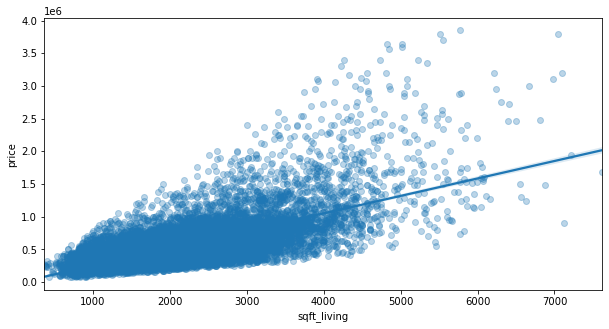

In [54]:
sqft_srs = df_train[['sqft_living','price']].sort_values(by='sqft_living')
sqft_df = sqft_srs.reset_index().drop('index',axis=1)
plt.figure(figsize=(10,5))
sns.regplot(x="sqft_living", y="price", data=sqft_df,scatter_kws={'alpha':0.3});

In [55]:
sqft_df.corr()

,sqft_living,price
sqft_living,1.000000,0.688536
price,0.688536,1.000000


Nice corealtion is existing between sqft_living and price

#### View_property vs Price

#### An index from 0 to 4 of how good the view of the property was

In [56]:
df_train.view_property.unique()

array([0, 1, 2, 3, 4])

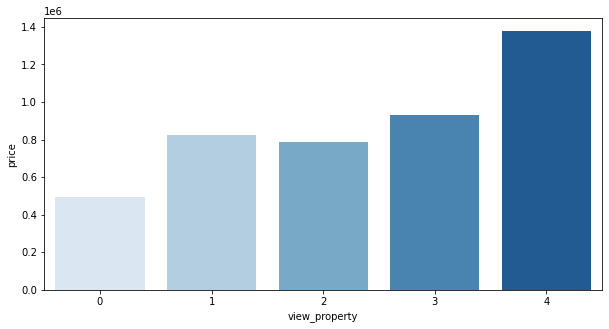

In [57]:
view = df_train.groupby("view_property", as_index=False)[['price']].mean()
plt.figure(figsize=(10,5))
sns.barplot(data=view, x=view["view_property"], y=view['price'], palette='Blues');

In [58]:
df_train[['view_property','price']].corr()

,view_property,price
view_property,1.000000,0.392876
price,0.392876,1.000000


View is having a good corelation of 39.7 %

#### Design_of_build Vs price

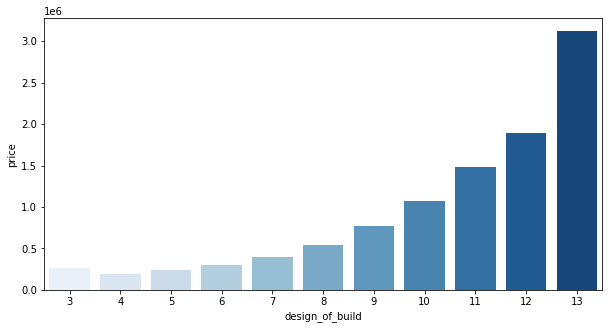

In [60]:
rtype = df_train.groupby('design_of_build', as_index=False)[['price']].mean()
plt.figure(figsize=(10,5))
sns.barplot(data=rtype, x=rtype['design_of_build'], y=rtype['price'], palette='Blues');

Clearly, as the features "design_of_build" increase, so does the Price

#### Year_built Vs price

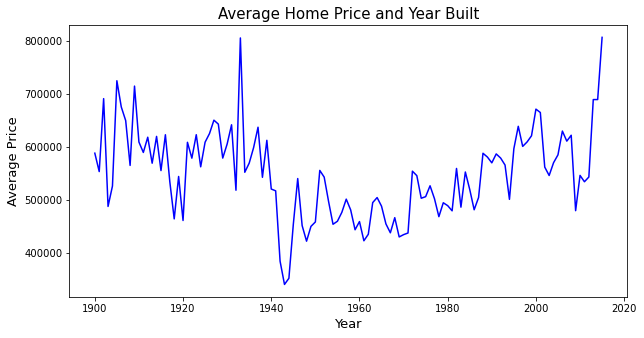

In [61]:
plt.figure(figsize=(10,5))

sns.lineplot(x='year_built', y='price', data=df_train,linewidth=1.5, color='blue', ci=None)

plt.title('Average Home Price and Year Built', size=15)
plt.ylabel('Average Price', size=13)
plt.xlabel('Year', size=13)

plt.show()

Houses built before 1940 and after 2000 have a higher average price. Houses approximately between 1945 - 1980 cost less on average.

#### Floors vs Price

Floors - Number of floors

In [62]:
df_train.floors.value_counts()

1.0    8576
2.0    6537
1.5    1527
3.0     478
2.5     120
3.5       6
Name: floors, dtype: int64

In [63]:
df_train.groupby('floors').price.max()

floors
1.0    3800000
1.5    2900000
2.0    3850000
2.5    3200000
3.0    3100000
3.5     563500
Name: price, dtype: int64

In [64]:
df_train[["floors","price"]].corr()

,floors,price
floors,1.00000,0.25763
price,0.25763,1.00000


On considering only floors, we are having positive correlation, but its small.

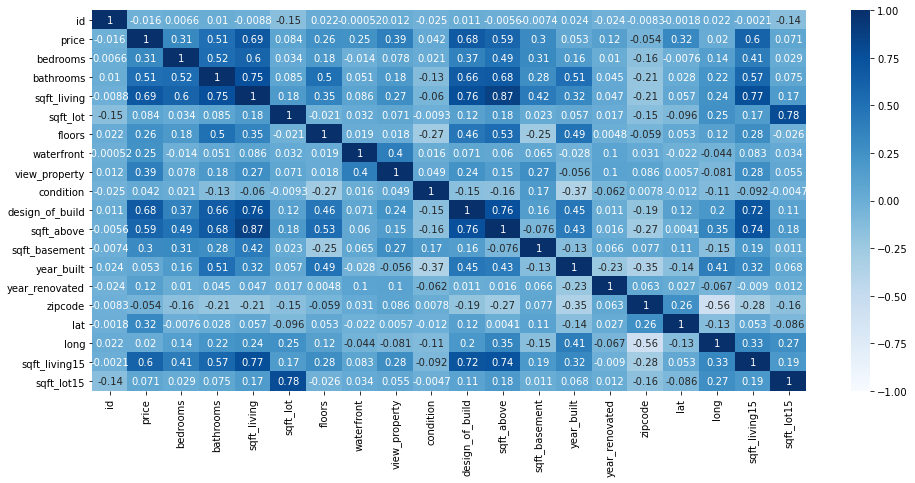

In [65]:
correlation = df_train.corr()
plt.figure(figsize=(16, 7))
heatmap = sns.heatmap(correlation,linewidths=0, vmin=-1,annot=True, cmap="Blues")

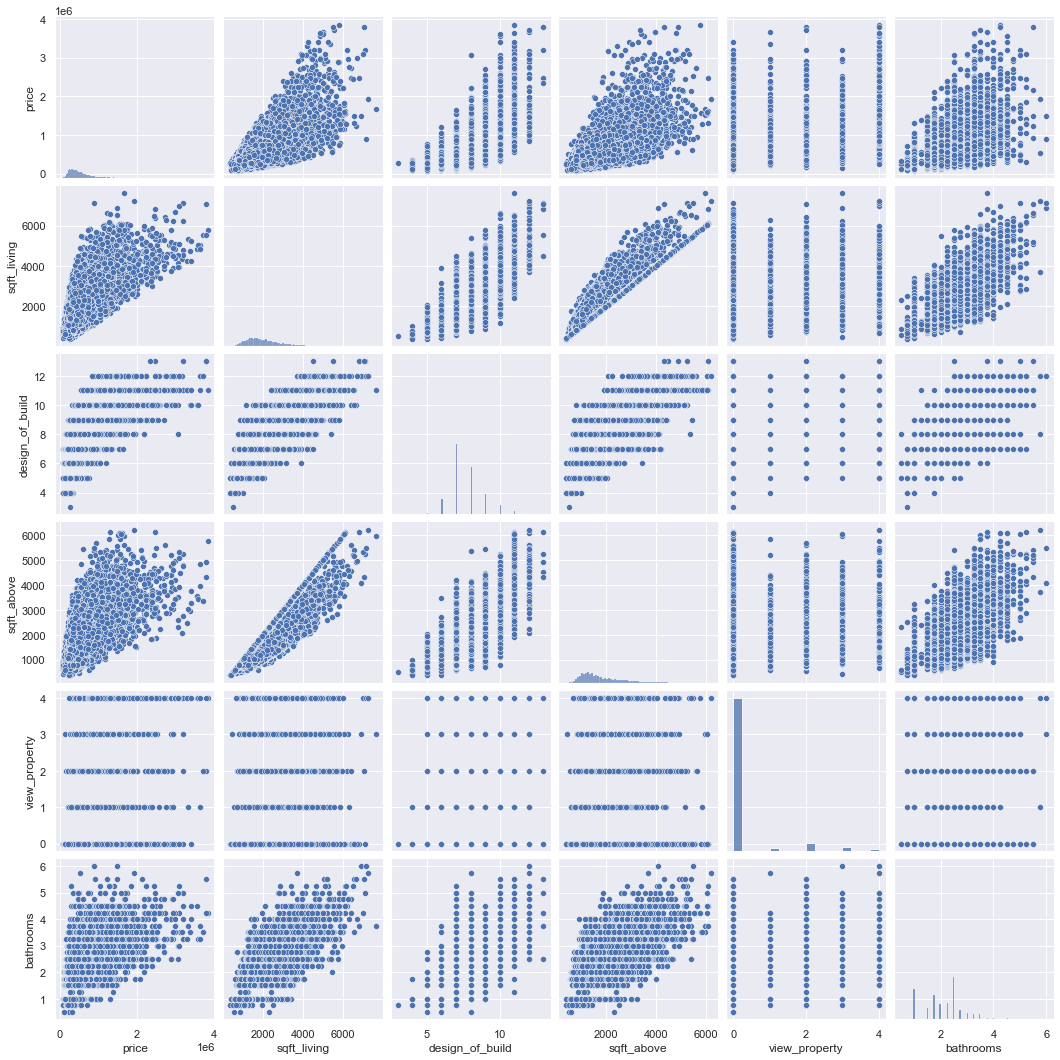

In [66]:
#scatterplot
sns.set()
cols = ['price', 'sqft_living', 'design_of_build', 'sqft_above', 'view_property', 'bathrooms']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

These overall scatterplots confirm the findings of the heatmap. There is myriad of linear correlation between sqft_living, sqft_above, bathrooms, grade. This yields an opportunity for to combine features. Moreover, what we learned that the above mentioned features have the biggest impact on sale price. One would also expect location to play a role, but as they are in latitude/longitude coordinates, it requires advanced data manipulation to take it into account. Finally, due to many linear relationships we can apply regression models.

### Modeling

In [67]:
dropped_vars = ['price','id', 'date','long']

X = df_train.drop(dropped_vars, axis=1)
y = df_train['price']